<img src="https://brand.umich.edu/assets/brand/style-guide/logo-guidelines/U-M_Logo-Horizontal-Hex.png" alt="Drawing" style="width: 300px;" align="left"/><br>
    
## Week 3: Investigating the biases of predictive models

Algorithmic bias and fairness has become one of the most popular topics in ML in recent years. It is a common misconception that ML models are 'objective'. However, ML models are reflections of human decision making, which is subject to biases. These decisions include which data to collect, which model to use, and which groundtruth labels to assign. Learning analytics etc...


**References**
* Gardner, J., Brooks, C., & Baker, R. (2019). Evaluating the fairness of predictive student models through slicing analysis. *In Proceedings of the 9th International Conference on Learning Analytics & Knowledge* (pp. 225-234). [[PDF]](https://homes.cs.washington.edu/~jpgard/papers/lak19_slicing.pdf)
* [A Tutorial on Fairness in Machine Learning by Ziyuan Zhong](https://towardsdatascience.com/a-tutorial-on-fairness-in-machine-learning-3ff8ba1040cb)


# Open University Learning Analytics (OULAD) dataset

Kuzilek, J., Hlosta, M., & Zdrahal, Z. (2017). Open university learning analytics dataset. Scientific data, 4, 170171. https://www.nature.com/articles/sdata2017171
## Data scheme
![](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fsdata.2017.171/MediaObjects/41597_2017_Article_BFsdata2017171_Fig2_HTML.jpg)
## Course timeline
![](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fsdata.2017.171/MediaObjects/41597_2017_Article_BFsdata2017171_Fig1_HTML.jpg)
## Relational database
* A module is a course
* A presentation is a semester (e.g., 2019J - Fall 2019, 2019B = Winter 2019)
* vle = virtual learning enviroment
![](https://analyse.kmi.open.ac.uk/resources/images/model.png)

---

## Part A (20 points)
Write a function that creates a supervised learning model to predict whether students pass or fail based on demographics data only:

* Create train_test_split with random_state = 42, stratified by outcome
* Standardize features using StandardScaler(). Only standardize the features after you split the data to avoid data leakage
* Apply a logistic regression (random_state=42)
* Return the ground truth label and the predicted probabilities for each gender, each disability status in the test set. 

The output should be a pd.DataFrame with the following columns: label, pred_proba, gender_F, disability_Y

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
"""The output data frame should have 4 columns: label, pred_proba, gender_F, disability_Y"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, precision_score
from sklearn.linear_model import LogisticRegression

def answer_a():
    # Import pre-procssed data
    merge = pd.read_csv("assets/demog.csv")

    # Extract feature columns and target column
    y = np.array(merge[['outcome']]).ravel()
    X = np.array(merge.drop(['outcome','code_module','code_presentation','id_student'], axis=1))
    
    ### BEGIN SOLUTION
    # Split train-test data using stratified sampling
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
    
    # Standardizing features 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    # Fit logistic regression
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)

    df_test = pd.DataFrame()
    df_test['label'] = y_test
    df_test['pred_proba'] = lr.predict_proba(X_test)[:,1]
    df_test['pred'] = lr.predict(X_test)
    
    df_test['gender_F'] = X_test[:,2]
    df_test.loc[df_test['gender_F']>0, 'gender_F'] = 1
    df_test.loc[df_test['gender_F']<0, 'gender_F'] = 0
    
    df_test['disability_Y'] = X_test[:,34]
    df_test.loc[df_test['disability_Y']>0, 'disability_Y'] = 1
    df_test.loc[df_test['disability_Y']<0, 'disability_Y'] = 0
    result = df_test
    ### END SOLUTION
    
    return result
answer_a()

,label,pred_proba,pred,gender_F,disability_Y
0,0,0.615832,1,0.0,0.0
1,1,0.645553,1,0.0,0.0
2,1,0.838235,1,1.0,0.0
3,1,0.811759,1,0.0,0.0
4,1,0.659895,1,0.0,0.0
...,...,...,...,...,...
5605,1,0.606594,1,1.0,0.0
5606,1,0.758521,1,0.0,0.0
5607,1,0.631683,1,1.0,0.0
5608,0,0.736386,1,1.0,0.0


In [10]:
import pandas as pd
import numpy as np

# Check the number of courses
assert len(answer_a()) == 5610, 'Make sure to set random_state = 42 while doing train_test_split'

# Check y_pred
assert answer_a()['pred'].sum() == 5228, 'Your output is incorrect'

### BEGIN HIDDEN TESTS
from pandas.testing import assert_frame_equal
def solution_a():
    # Import pre-procssed data
    merge = pd.read_csv("assets/demog.csv")

    # Extract feature columns and target column
    y = np.array(merge[['outcome']]).ravel()
    X = np.array(merge.drop(['outcome','code_module','code_presentation','id_student'], axis=1))
    
    # Split train-test data using stratified sampling
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
    
    # Standardizing features 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    # Fit logistic regression
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)

    df_test = pd.DataFrame()
    df_test['label'] = y_test
    df_test['pred_proba'] = lr.predict_proba(X_test)[:,1]
    df_test['pred'] = lr.predict(X_test)
    
    df_test['gender_F'] = X_test[:,2]
    df_test.loc[df_test['gender_F']>0, 'gender_F'] = 1
    df_test.loc[df_test['gender_F']<0, 'gender_F'] = 0
    
    df_test['disability_Y'] = X_test[:,34]
    df_test.loc[df_test['disability_Y']>0, 'disability_Y'] = 1
    df_test.loc[df_test['disability_Y']<0, 'disability_Y'] = 0
    result = df_test
    
    return result
assert_frame_equal(answer_a(), solution_a(), check_dtype=False, check_names=False,check_like=True,check_exact=False)

### END HIDDEN TESTS

---

## Part B (10 points)
Write a function that returns the Statistical Parity Difference (SPD) for gender and disability status

Demographic parity or statistical parity suggests that a predictor is unbiased if the same proportion of each population are classified as positive. For example, female and male students should have the same proportion of being classified as 'Pass'.

Deviations from statistical parity are measured by the statistical parity difference

$SPD = |Pr(Y=1|D=unprivileged)−Pr(Y=1|D=privileged)|$

The US legal theory uses the “disparate impact” principle: a practice is considered illegal discrimination if it has a “disproportionately adverse” effect on members of a protected group. “disproportionately adverse” is usually defined using the 80% Rule.


In [11]:
def answer_b():
    # Import data from answer_a()
    df_test = answer_a()
    
    SPD_gender = None
    SPD_disability = None

    ### BEGIN SOLUTION
    F = len(df_test[(df_test['pred'] ==1)& (df_test['gender_F']==1)])/len(df_test[df_test['gender_F']==1])
    M = len(df_test[(df_test['pred'] ==1)& (df_test['gender_F']==0)])/len(df_test[df_test['gender_F']==0])
    SPD_gender = abs(F-M)
    
    D = len(df_test[(df_test['pred'] ==1)& (df_test['disability_Y']==1)])/len(df_test[df_test['disability_Y']==1])
    ND = len(df_test[(df_test['pred'] ==1)& (df_test['disability_Y']==0)])/len(df_test[df_test['disability_Y']==0])
    SPD_disability = abs(D-ND)
    
    ### END SOLUTION
    result = { 'SPD_gender': SPD_gender, 'SPD_disability': SPD_disability}
    return result
answer_b()

{'SPD_gender': 0.02102179719135011, 'SPD_disability': 0.11764110671389827}

In [5]:
# Assert output
x = answer_b()['SPD_gender'] + answer_b()['SPD_disability']
np.testing.assert_almost_equal(x, 0.13866, decimal=4, 
                               err_msg='Your output is not correct', verbose=False)

# Hidden test

### BEGIN HIDDEN TESTS
def solution_b():
    
    # Import data from answer_a()
    df_test = answer_a()
    
    SPD_gender = None
    SPD_disability = None

    F = len(df_test[(df_test['pred'] ==1)& (df_test['gender_F']==1)])/len(df_test[df_test['gender_F']==1])
    M = len(df_test[(df_test['pred'] ==1)& (df_test['gender_F']==0)])/len(df_test[df_test['gender_F']==0])
    SPD_gender = abs(F-M)
    
    D = len(df_test[(df_test['pred'] ==1)& (df_test['disability_Y']==1)])/len(df_test[df_test['disability_Y']==1])
    ND = len(df_test[(df_test['pred'] ==1)& (df_test['disability_Y']==0)])/len(df_test[df_test['disability_Y']==0])
    SPD_disability = abs(D-ND)
    
    result = { 'SPD_gender': SPD_gender, 'SPD_disability': SPD_disability}
    return result

# Assert SPD values
np.testing.assert_almost_equal(answer_b()['SPD_gender'], solution_b()['SPD_gender'], decimal=4, 
                               err_msg='The statistical parity difference (SPD) for gender is not correct', verbose=False)
np.testing.assert_almost_equal(answer_b()['SPD_disability'], solution_b()['SPD_disability'], decimal=4, 
                               err_msg='The statistical parity difference (SPD) for disability status is not correct', verbose=False)

### END HIDDEN TESTS

---

## Part C (10 points)
Write a function that returns Equal Opportunity Difference (EOD) for gender and disability status

Equal Opportunity states that each group should get the positive outcome at equal rates (i.e. equal True Positive Rate), assuming that people in this group qualify for it. 

$EOD = |TPR_{unprivileged} - TPR_{privileged}|$


In [27]:
def answer_c():
    # Import data from answer_a()
    df_test = answer_a()
    
    EOD_gender = None
    EOD_disability = None

    ### BEGIN SOLUTION
    from sklearn.metrics import confusion_matrix
    df_test_F = df_test.loc[df_test['gender_F']==1]
    TN, FP, FN, TP = confusion_matrix(df_test_F['label'], df_test_F['pred']).ravel()
    TPR_F = TP/(TP+FN)

    df_test_M = df_test.loc[df_test['gender_F']==0]
    TN, FP, FN, TP = confusion_matrix(df_test_M['label'], df_test_M['pred']).ravel()
    TPR_M = TP/(TP+FN)

    EOD_gender = abs(TPR_F-TPR_M)

    df_test_D = df_test.loc[df_test['disability_Y']==1]
    TN, FP, FN, TP = confusion_matrix(df_test_D['label'], df_test_D['pred']).ravel()
    TPR_D = TP/(TP+FN)

    df_test_ND = df_test.loc[df_test['disability_Y']==0]
    TN, FP, FN, TP = confusion_matrix(df_test_ND['label'], df_test_ND['pred']).ravel()
    TPR_ND = TP/(TP+FN)

    EOD_disability = abs(TPR_D-TPR_ND)

    ### END SOLUTION
    result = { 'EOD_gender': EOD_gender, 'EOD_disability': EOD_disability}
    return result

answer_c()

{'EOD_gender': 0.015775958915101862, 'EOD_disability': 0.10343004804811762}

In [30]:
# Assert output
x = answer_c()['EOD_gender'] + answer_c()['EOD_disability']
np.testing.assert_almost_equal(x, 0.1192, decimal=4, 
                               err_msg='Your output is not correct', verbose=False)


# Hidden test

### BEGIN HIDDEN TESTS
def solution_c():
    # Import data from answer_a()
    df_test = answer_a()
    
    EOD_gender = None
    EOD_disability = None
    
    from sklearn.metrics import confusion_matrix
    df_test_F = df_test.loc[df_test['gender_F']==1]
    TN, FP, FN, TP = confusion_matrix(df_test_F['label'], df_test_F['pred']).ravel()
    TPR_F = TP/(TP+FN)

    df_test_M = df_test.loc[df_test['gender_F']==0]
    TN, FP, FN, TP = confusion_matrix(df_test_M['label'], df_test_M['pred']).ravel()
    TPR_M = TP/(TP+FN)

    EOD_gender = abs(TPR_F-TPR_M)

    df_test_D = df_test.loc[df_test['disability_Y']==1]
    TN, FP, FN, TP = confusion_matrix(df_test_D['label'], df_test_D['pred']).ravel()
    TPR_D = TP/(TP+FN)

    df_test_ND = df_test.loc[df_test['disability_Y']==0]
    TN, FP, FN, TP = confusion_matrix(df_test_ND['label'], df_test_ND['pred']).ravel()
    TPR_ND = TP/(TP+FN)

    EOD_disability = abs(TPR_D-TPR_ND)
    
    result = { 'EOD_gender': EOD_gender, 'EOD_disability': EOD_disability}
    return result

# Assert SPD values
np.testing.assert_almost_equal(answer_c()['EOD_gender'], solution_c()['EOD_gender'], decimal=4, 
                               err_msg='The Equal Opportunity Difference (EOD) for gender is not correct', verbose=False)
np.testing.assert_almost_equal(answer_c()['EOD_disability'], solution_c()['EOD_disability'], decimal=4, 
                               err_msg='The Equal Opportunity Difference (EOD) for disability status is not correct', verbose=False)

### END HIDDEN TESTS

---

## Part D (10 points)
Write a function that returns Average Absolute Odds Difference (AAOD) for gender and disability status

Equalized Odds means that the true positive rate and false positive rate will be the same for each population. 

The deviation from Equalized Odds can be measured as the Average Absolute Odds Difference (AAOD)

$AAOD = \frac{1}{2}(|TPR_{unprivileged} - TPR_{privileged}| + |FPR_{unprivileged} - FPR_{privileged}|) $


In [31]:
def answer_d():
    # Import data from answer_a()
    df_test = answer_a()
    
    AAOD_gender = None
    AAOD_disability = None

    ### BEGIN SOLUTION
    from sklearn.metrics import confusion_matrix
    df_test_F = df_test.loc[df_test['gender_F']==1]
    TN, FP, FN, TP = confusion_matrix(df_test_F['label'], df_test_F['pred']).ravel()
    TPR_F = TP/(TP+FN)
    FPR_F = FP/(FP+TN)

    df_test_M = df_test.loc[df_test['gender_F']==0]
    TN, FP, FN, TP = confusion_matrix(df_test_M['label'], df_test_M['pred']).ravel()
    TPR_M = TP/(TP+FN)
    FPR_M = FP/(FP+TN)
    
    AAOD_gender = (abs(TPR_F-TPR_M)+abs(FPR_F-FPR_M))/2

    df_test_D = df_test.loc[df_test['disability_Y']==1]
    TN, FP, FN, TP = confusion_matrix(df_test_D['label'], df_test_D['pred']).ravel()
    TPR_D = TP/(TP+FN)
    FPR_D = FP/(FP+TN)
    
    df_test_ND = df_test.loc[df_test['disability_Y']==0]
    TN, FP, FN, TP = confusion_matrix(df_test_ND['label'], df_test_ND['pred']).ravel()
    TPR_ND = TP/(TP+FN)
    FPR_ND = FP/(FP+TN)
    
    AAOD_disability = (abs(TPR_D-TPR_ND)+abs(FPR_D-FPR_ND))/2

    ### END SOLUTION
    result = { 'AAOD_gender': AAOD_gender, 'AAOD_disability': AAOD_disability}
    return result
answer_d()

{'AAOD_gender': 0.021734738248697982, 'AAOD_disability': 0.11925633011348458}

In [33]:
# Assert output
x = answer_d()['AAOD_gender'] + answer_d()['AAOD_disability']
np.testing.assert_almost_equal(x, 0.1409, decimal=3, 
                               err_msg='Your output is not correct', verbose=False)

# Hidden test

### BEGIN HIDDEN TESTS
def solution_d():
     # Import data from answer_a()
    df_test = answer_a()
    
    AAOD_gender = None
    AAOD_disability = None

    from sklearn.metrics import confusion_matrix
    df_test_F = df_test.loc[df_test['gender_F']==1]
    TN, FP, FN, TP = confusion_matrix(df_test_F['label'], df_test_F['pred']).ravel()
    TPR_F = TP/(TP+FN)
    FPR_F = FP/(FP+TN)

    df_test_M = df_test.loc[df_test['gender_F']==0]
    TN, FP, FN, TP = confusion_matrix(df_test_M['label'], df_test_M['pred']).ravel()
    TPR_M = TP/(TP+FN)
    FPR_M = FP/(FP+TN)
    
    AAOD_gender = (abs(TPR_F-TPR_M)+abs(FPR_F-FPR_M))/2

    df_test_D = df_test.loc[df_test['disability_Y']==1]
    TN, FP, FN, TP = confusion_matrix(df_test_D['label'], df_test_D['pred']).ravel()
    TPR_D = TP/(TP+FN)
    FPR_D = FP/(FP+TN)
    
    df_test_ND = df_test.loc[df_test['disability_Y']==0]
    TN, FP, FN, TP = confusion_matrix(df_test_ND['label'], df_test_ND['pred']).ravel()
    TPR_ND = TP/(TP+FN)
    FPR_ND = FP/(FP+TN)
    
    AAOD_disability = (abs(TPR_D-TPR_ND)+abs(FPR_D-FPR_ND))/2
    
    result = { 'AAOD_gender': AAOD_gender, 'AAOD_disability': AAOD_disability}
    return result

# Assert SPD values
np.testing.assert_almost_equal(answer_d()['AAOD_gender'], solution_d()['AAOD_gender'], decimal=4, 
                               err_msg='The Average Absolute Odds Difference (AAOD) for gender is not correct', verbose=False)
np.testing.assert_almost_equal(answer_d()['AAOD_disability'], solution_d()['AAOD_disability'], decimal=4, 
                               err_msg='The Average Absolute Odds Difference (AAOD) for disability status is not correct', verbose=False)

### END HIDDEN TESTS

### Run the code below to plot the ROC curve for each gender

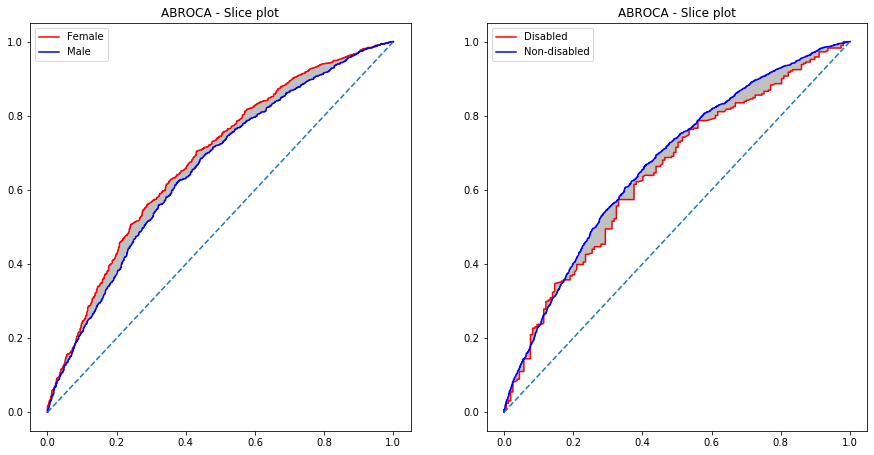

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15,7.5))

from sklearn.metrics import roc_curve, roc_auc_score

# Import data from answer_a()
df_test = answer_a()

for i, j, label1, label2 in [('gender_F',0,'Female', 'Male'),
                             ('disability_Y',1,'Disabled', 'Non-disabled')]:

    # Getting predicted probabilities for each group
    y_score_1 = df_test.loc[df_test[i]==1,'pred_proba']
    y_score_2 = df_test.loc[df_test[i]==0,'pred_proba']

    # Getting labels for each group
    y_test_1 = df_test.loc[df_test[i]==1,'label']
    y_test_2 = df_test.loc[df_test[i]==0,'label']

    # Ploting ROC Curve

    # Creating true and false positive rates
    FPR1, TPR1, _ = roc_curve(y_test_1, y_score_1)
    FPR2, TPR2, _ = roc_curve(y_test_2, y_score_2)
     

    # Plot Female ROC
    axs[j].plot(
        FPR1,
        TPR1,
        label=label1,
        linestyle="-",
        color="r",
    )

    # Plot Male ROC
    axs[j].plot(
        FPR2,
        TPR2,
        label=label2,
        linestyle="-",
        color="b",
    )

    # Plot shaded area
    axs[j].fill(
        FPR1.tolist() + np.flipud(FPR2).tolist(),
        TPR1.tolist() + np.flipud(TPR2).tolist(),
        "y",
        color="silver"
    )

    # Plot diagonal line
    axs[j].plot([0, 1], ls="--")
    axs[j].legend()
    axs[j].set_title('ABROCA - Slice plot')



---

## Part E (20 points)

One way to measure the model fairness is to compute the shaded area between ROC curves, also known as the Absolute Between-ROC Area (ABROCA)

Write a function that 

* Compute the ABROCA

abroca = $\int\limits_0^1 |ROC_i{(t)} - ROC_j{(t)}|{dt}$
* Return the result by gender, and disability status

The output should be a dictionary { 'abroca_gender': abroca_gender, 'abroca_disability': abroca_disability}

Hints:
* To compute the integral between two curves, you might want to check out [integrate.quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html)
* To approximate an ROC curve, you might want to use [interpolate.interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html)

In [37]:
import sklearn.metrics as metrics
from scipy import interpolate
from scipy import integrate
import warnings
warnings.filterwarnings('ignore')

def answer_e():
    # Import data from answer_a()
    df_test = answer_a()
    
    abroca_gender = None
    abroca_disability = None

    ### BEGIN SOLUTION
    def compute_roc(y_scores, y_true):
    
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        return fpr, tpr

    def interpolate_roc_fun(fpr, tpr, n_grid):
        """
        Function to Use interpolation to make approximate the Receiver Operating Characteristic (ROC) curve along n_grid equally-spaced values.
        fpr - vector of false positive rates computed from compute_roc
        tpr - vector of true positive rates computed from compute_roc
        n_grid - number of approximation points to use (default value of 10000 more than adequate for most applications) (numeric)
        Returns  a list with components x and y, containing n coordinates which  interpolate the given data points according to the method (and rule) desired
        """
        roc_approx = interpolate.interp1d(x=fpr, y=tpr)
        x_new = np.linspace(0, 1, num=n_grid)
        y_new = roc_approx(x_new)
        return x_new, y_new

    def compute_abroca(
        df,
        pred_col,
        label_col,
        protected_attr_col,
        majority_protected_attr_val,
        n_grid=10000,
        plot_slices=False,
        lb=0,
        ub=1,
        limit=1000,
        file_name="slice_image.png",
    ):
        # Compute the value of the abroca statistic.
        """
        df - dataframe containing colnames matching pred_col, label_col and protected_attr_col
        pred_col - name of column containing predicted probabilities (string)
        label_col - name of column containing true labels (should be 0,1 only) (string)
        protected_attr_col - name of column containing protected attribute (should be binary) (string)
        majority_protected_attr_val name of 'majority' group with respect to protected attribute (string)
        n_grid (optional) - number of grid points to use in approximation (numeric) (default of 10000 is more than adequate for most cases)
        plot_slices (optional) - if TRUE, ROC slice plots are generated and saved to file_name (boolean)
        lb (optional) - Lower limit of integration (use -numpy.inf for -infinity) Default is 0
        ub (optional) - Upper limit of integration (use -numpy.inf for -infinity) Default is 1
        limit (optional) - An upper bound on the number of subintervals used in the adaptive algorithm.Default is 1000
        file_name (optional) - File name (including directory) to save the slice plot generated
        Returns Abroca value
        """

        # initialize data structures
        # slice_score = 0
        prot_attr_values = df[protected_attr_col].value_counts().index.values
        fpr_tpr_dict = {}

        # compute roc within each group of pa_values
        for pa_value in prot_attr_values:
            if pa_value != majority_protected_attr_val:
                minority_protected_attr_val = pa_value
            pa_df = df[df[protected_attr_col] == pa_value]
            fpr_tpr_dict[pa_value] = compute_roc(pa_df[pred_col], pa_df[label_col])

        # compare minority to majority class; accumulate absolute difference btw ROC curves to slicing statistic
        majority_roc_x, majority_roc_y = interpolate_roc_fun(
            fpr_tpr_dict[majority_protected_attr_val][0],
            fpr_tpr_dict[majority_protected_attr_val][1],
            n_grid,
        )
        minority_roc_x, minority_roc_y = interpolate_roc_fun(
            fpr_tpr_dict[minority_protected_attr_val][0],
            fpr_tpr_dict[minority_protected_attr_val][1],
            n_grid,
        )

        # use function approximation to compute slice statistic via piecewise linear function
        if list(majority_roc_x) == list(minority_roc_x):
            f1 = interpolate.interp1d(x=majority_roc_x, y=(majority_roc_y - minority_roc_y))
            f2 = lambda x, acc: abs(f1(x))
            slice, _ = integrate.quad(f2, lb, ub, limit)
        else:
            print("Majority and minority FPR are different")
            exit(1)



        return slice

    abroca_gender = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'label', protected_attr_col = 'gender_F',
                               majority_protected_attr_val = 1, n_grid = 10000)
    abroca_disability = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'label', protected_attr_col = 'disability_Y',
                               majority_protected_attr_val = 1, n_grid = 10000)
    ### END SOLUTION
    result = { 'abroca_gender': abroca_gender, 'abroca_disability': abroca_disability}
    return result
answer_e()

{'abroca_gender': 0.024782045055100076,
 'abroca_disability': 0.026184170851642333}

In [38]:
import sklearn.metrics as metrics
from scipy import interpolate
from scipy import integrate
import warnings
warnings.filterwarnings('ignore')

# Assert output
x = answer_e()['abroca_gender'] + answer_e()['abroca_disability']
np.testing.assert_almost_equal(x, 0.0509, decimal=4, 
                               err_msg='Your output is not correct', verbose=False)

# Hidden test

### BEGIN HIDDEN TESTS
def solution_e():
    # Import data from answer_a()
    df_test = answer_a()
    
    abroca_gender = None
    abroca_disability = None


    def compute_roc(y_scores, y_true):
    
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        return fpr, tpr

    def interpolate_roc_fun(fpr, tpr, n_grid):
        """
        Function to Use interpolation to make approximate the Receiver Operating Characteristic (ROC) curve along n_grid equally-spaced values.
        fpr - vector of false positive rates computed from compute_roc
        tpr - vector of true positive rates computed from compute_roc
        n_grid - number of approximation points to use (default value of 10000 more than adequate for most applications) (numeric)
        Returns  a list with components x and y, containing n coordinates which  interpolate the given data points according to the method (and rule) desired
        """
        roc_approx = interpolate.interp1d(x=fpr, y=tpr)
        x_new = np.linspace(0, 1, num=n_grid)
        y_new = roc_approx(x_new)
        return x_new, y_new

    def compute_abroca(
        df,
        pred_col,
        label_col,
        protected_attr_col,
        majority_protected_attr_val,
        n_grid=10000,
        plot_slices=False,
        lb=0,
        ub=1,
        limit=1000,
        file_name="slice_image.png",
    ):
        # Compute the value of the abroca statistic.
        """
        df - dataframe containing colnames matching pred_col, label_col and protected_attr_col
        pred_col - name of column containing predicted probabilities (string)
        label_col - name of column containing true labels (should be 0,1 only) (string)
        protected_attr_col - name of column containing protected attribute (should be binary) (string)
        majority_protected_attr_val name of 'majority' group with respect to protected attribute (string)
        n_grid (optional) - number of grid points to use in approximation (numeric) (default of 10000 is more than adequate for most cases)
        plot_slices (optional) - if TRUE, ROC slice plots are generated and saved to file_name (boolean)
        lb (optional) - Lower limit of integration (use -numpy.inf for -infinity) Default is 0
        ub (optional) - Upper limit of integration (use -numpy.inf for -infinity) Default is 1
        limit (optional) - An upper bound on the number of subintervals used in the adaptive algorithm.Default is 1000
        file_name (optional) - File name (including directory) to save the slice plot generated
        Returns Abroca value
        """

        # initialize data structures
        # slice_score = 0
        prot_attr_values = df[protected_attr_col].value_counts().index.values
        fpr_tpr_dict = {}

        # compute roc within each group of pa_values
        for pa_value in prot_attr_values:
            if pa_value != majority_protected_attr_val:
                minority_protected_attr_val = pa_value
            pa_df = df[df[protected_attr_col] == pa_value]
            fpr_tpr_dict[pa_value] = compute_roc(pa_df[pred_col], pa_df[label_col])

        # compare minority to majority class; accumulate absolute difference btw ROC curves to slicing statistic
        majority_roc_x, majority_roc_y = interpolate_roc_fun(
            fpr_tpr_dict[majority_protected_attr_val][0],
            fpr_tpr_dict[majority_protected_attr_val][1],
            n_grid,
        )
        minority_roc_x, minority_roc_y = interpolate_roc_fun(
            fpr_tpr_dict[minority_protected_attr_val][0],
            fpr_tpr_dict[minority_protected_attr_val][1],
            n_grid,
        )

        # use function approximation to compute slice statistic via piecewise linear function
        if list(majority_roc_x) == list(minority_roc_x):
            f1 = interpolate.interp1d(x=majority_roc_x, y=(majority_roc_y - minority_roc_y))
            f2 = lambda x, acc: abs(f1(x))
            slice, _ = integrate.quad(f2, lb, ub, limit)
        else:
            print("Majority and minority FPR are different")
            exit(1)



        return slice

    abroca_gender = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'label', protected_attr_col = 'gender_F',
                               majority_protected_attr_val = 1, n_grid = 10000)
    abroca_disability = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'label', protected_attr_col = 'disability_Y',
                               majority_protected_attr_val = 1, n_grid = 10000)
   
    result = { 'abroca_gender': abroca_gender, 'abroca_disability': abroca_disability}
    return result

# Assert abroca values
np.testing.assert_almost_equal(answer_e()['abroca_gender'], solution_e()['abroca_gender'], decimal=4, 
                               err_msg='The abroca for gender is not correct', verbose=False)
np.testing.assert_almost_equal(answer_e()['abroca_disability'], solution_e()['abroca_disability'], decimal=4, 
                               err_msg='The abroca for disability status is not correct', verbose=False)

### END HIDDEN TESTS

---

## Part F (10 points)

So far we have used only demographics data. Let's incorporate the first 3 TMA scores and VLE data of the first 100 days to see how the model accuracy and fairness metrics would change. 

Write a function that creates a supervised learning model to predict whether students pass or fail based on demographics data and VLE data:

* Create train_test_split with random_state = 42, stratified by outcome
* Standardize features using StandardScaler(). Only standardize the features after you split the data to avoid data leakage
* Apply a logistic regression (random_state=42)
* Return the ground truth label and the predicted probabilities for each gender, each disability status in the test set. 

The output should be a pd.DataFrame with the following columns: label, pred_proba, gender_F, disability_Y

In [39]:
"""The output data frame should have 4 columns: label, pred_proba, gender_F, disability_Y"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, precision_score
from sklearn.linear_model import LogisticRegression

def answer_f():
    # Import pre-procssed data
    df = pd.read_csv("assets/demogVLE.csv")

    # Extract feature columns and target column
    y = np.array(df[['outcome']]).ravel()
    X = np.array(df.drop(['outcome','code_module','code_presentation','id_student'], axis=1))

    ### BEGIN SOLUTION
    # Split train-test data using stratified sampling
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)    
    
    # Standardizing features 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    # Fit logistic regression
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)

    df_test = pd.DataFrame()
    df_test['label'] = y_test
    df_test['pred_proba'] = lr.predict_proba(X_test)[:,1]
    df_test['pred'] = lr.predict(X_test)
    
    df_test['gender_F'] = X_test[:,2]
    df_test.loc[df_test['gender_F']>0, 'gender_F'] = 1
    df_test.loc[df_test['gender_F']<0, 'gender_F'] = 0
    
    df_test['disability_Y'] = X_test[:,34]
    df_test.loc[df_test['disability_Y']>0, 'disability_Y'] = 1
    df_test.loc[df_test['disability_Y']<0, 'disability_Y'] = 0
    result = df_test
    ### END SOLUTION
    
    return result
answer_f()

,label,pred_proba,pred,gender_F,disability_Y
0,0,0.563606,1,0.0,0.0
1,1,0.893984,1,0.0,0.0
2,1,0.937026,1,1.0,0.0
3,1,0.932578,1,0.0,0.0
4,1,0.925027,1,0.0,0.0
...,...,...,...,...,...
5605,1,0.558485,1,1.0,0.0
5606,1,0.848413,1,0.0,0.0
5607,1,0.309744,0,1.0,0.0
5608,0,0.921524,1,1.0,0.0


In [42]:
import pandas as pd
import numpy as np

# Check the number of courses
assert len(answer_f()) == 5610, 'Make sure to set random_state = 42 while doing train_test_split'

# Check y_pred
assert answer_f()['pred'].sum() == 4067, 'Your output is incorrect'

### BEGIN HIDDEN TESTS
from pandas.testing import assert_frame_equal
def solution_f():
    # Import pre-procssed data
    df = pd.read_csv("assets/demogVLE.csv")

    # Extract feature columns and target column
    y = np.array(df[['outcome']]).ravel()
    X = np.array(df.drop(['outcome','code_module','code_presentation','id_student'], axis=1))

    # Split train-test data using stratified sampling
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)  
    
    # Standardizing features 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    # Fit logistic regression
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)

    df_test = pd.DataFrame()
    df_test['label'] = y_test
    df_test['pred_proba'] = lr.predict_proba(X_test)[:,1]
    df_test['pred'] = lr.predict(X_test)
    
    df_test['gender_F'] = X_test[:,2]
    df_test.loc[df_test['gender_F']>0, 'gender_F'] = 1
    df_test.loc[df_test['gender_F']<0, 'gender_F'] = 0
    
    df_test['disability_Y'] = X_test[:,34]
    df_test.loc[df_test['disability_Y']>0, 'disability_Y'] = 1
    df_test.loc[df_test['disability_Y']<0, 'disability_Y'] = 0
    result = df_test
    
    return result
assert_frame_equal(answer_f(), solution_f(), check_dtype=False, check_names=False,check_like=True,check_exact=False)

### END HIDDEN TESTS

### Let's plot the ABROCA slice-plot to compare how the model accuracy and fairness has changed when we added assignment scores and VLE trace data of the first 100 days

Did you see any difference in accuracy and the disparaity gains between the two models?

Text(0.5, 1.0, 'ABROCA - Demographics+Assignment+VLE')

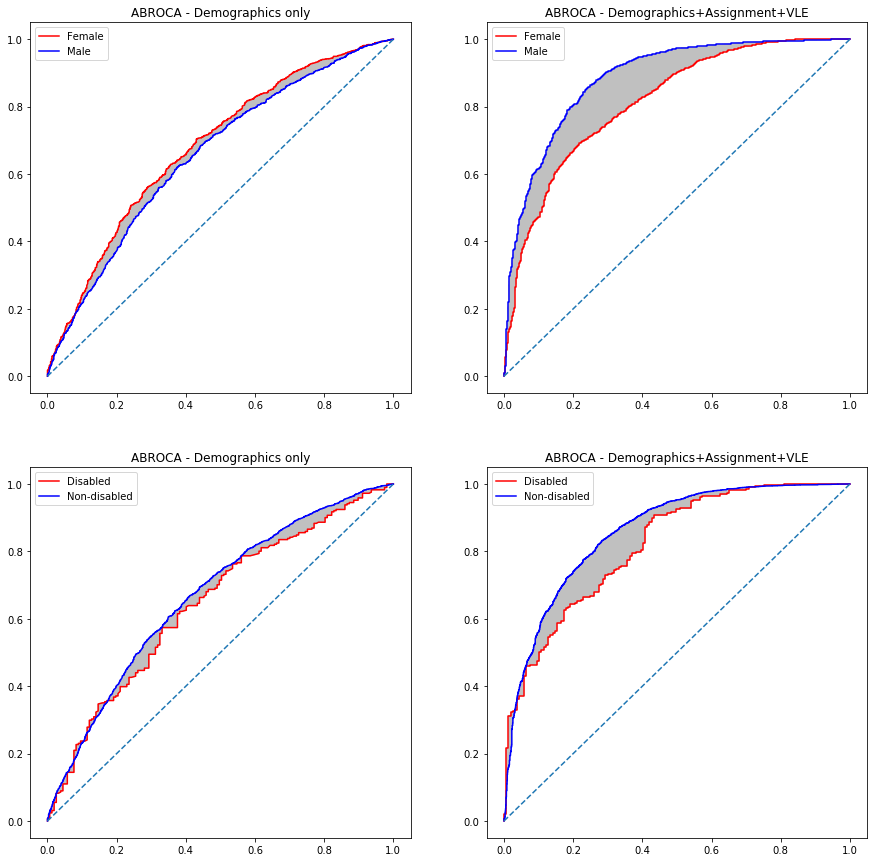

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))

from sklearn.metrics import roc_curve, roc_auc_score

# Import data from answer_a and answer_f
df1 = answer_a()
df2 = answer_f()

for df, i, x, y, label1, label2,  in [(df1,'gender_F',0,0,'Female', 'Male'),
                                     (df2,'gender_F',0,1,'Female', 'Male'),
                                     (df1,'disability_Y',1,0,'Disabled', 'Non-disabled'),
                                     (df2,'disability_Y',1,1,'Disabled', 'Non-disabled')]:

    # Getting predicted probabilities for each group
    y_score_1 = df.loc[df[i]==1,'pred_proba']
    y_score_2 = df.loc[df[i]==0,'pred_proba']

    # Getting labels for each group
    y_test_1 = df.loc[df[i]==1,'label']
    y_test_2 = df.loc[df[i]==0,'label']

    # Ploting ROC Curve

    # Creating true and false positive rates
    FPR1, TPR1, _ = roc_curve(y_test_1, y_score_1)
    FPR2, TPR2, _ = roc_curve(y_test_2, y_score_2)
     

    # Plot Female ROC
    axs[x, y].plot(
        FPR1,
        TPR1,
        label= label1,
        linestyle="-",
        color="r",
    )

    # Plot Male ROC
    axs[x, y].plot(
        FPR2,
        TPR2,
        label= label2,
        linestyle="-",
        color="b",
    )

    # Plot shaded area
    axs[x, y].fill(
        FPR1.tolist() + np.flipud(FPR2).tolist(),
        TPR1.tolist() + np.flipud(TPR2).tolist(),
        "y",
        color="silver"
    )

    # Plot diagonal line
    axs[x, y].plot([0, 1], ls="--")
    axs[x, y].legend()

axs[0, 0].set_title('ABROCA - Demographics only')
axs[1, 0].set_title('ABROCA - Demographics only')
axs[0, 1].set_title('ABROCA - Demographics+Assignment+VLE')
axs[1, 1].set_title('ABROCA - Demographics+Assignment+VLE')

---

## Part G (20 points)
Write a function that returns the 
* Statistical Parity Difference (SPD)
* Equal Opportunity Difference (EOD)
* Average Absolute Odds Difference (AAOD)
* Absolute Between-ROC Area (ABROCA)
* AUC score

for gender and disability status using the predictive models in answer_f() and answer_a().

What do you think about the trade-off between accuracy and fairness between the two models?

The output should consists of the following columns 

* Metrics
* Attribute
* Demog
* DemogVLE

In [49]:
def answer_g():
    # Import data from previous answers
    df1 = answer_a()
    df2 = answer_f()
    
    # Create an empty dataframe
    result = pd.DataFrame({'Metrics': ['SPD','EOD','AAOD','ABROCA']*2, 
                       'Attribute': ['Gender', 'Gender','Gender','Gender','Disability','Disability','Disability','Disability'],
                       'Model A_Demog': int(),
                       'Model F_DemogVLE': int()})
    result.loc[9] = ['AUC','All',0,0]
    result
    
    ### BEGIN SOLUTION
    
    for df_test, model in [(df1, 'Model A_Demog'),
                           (df2, 'Model F_DemogVLE')]:

        # Calculate SPD of gender
        F = len(df_test[(df_test['pred'] ==1)& (df_test['gender_F']==1)])/len(df_test[df_test['gender_F']==1])
        M = len(df_test[(df_test['pred'] ==1)& (df_test['gender_F']==0)])/len(df_test[df_test['gender_F']==0])
        SPD_gender = abs(F-M)
        result.loc[(result['Metrics']=='SPD') & (result['Attribute']=='Gender'),model] = SPD_gender

        # Calculate SPD of disability status
        D = len(df_test[(df_test['pred'] ==1)& (df_test['disability_Y']==1)])/len(df_test[df_test['disability_Y']==1])
        ND = len(df_test[(df_test['pred'] ==1)& (df_test['disability_Y']==0)])/len(df_test[df_test['disability_Y']==0])
        SPD_disability = abs(D-ND)
        result.loc[(result['Metrics']=='SPD') & (result['Attribute']=='Disability'),model] = SPD_disability

        from sklearn.metrics import confusion_matrix

        # Calculate EOD of gender
        df_test_F = df_test.loc[df_test['gender_F']==1]
        TN, FP, FN, TP = confusion_matrix(df_test_F['label'], df_test_F['pred']).ravel()
        TPR_F = TP/(TP+FN)

        df_test_M = df_test.loc[df_test['gender_F']==0]
        TN, FP, FN, TP = confusion_matrix(df_test_M['label'], df_test_M['pred']).ravel()
        TPR_M = TP/(TP+FN)

        EOD_gender = abs(TPR_F-TPR_M)
        result.loc[(result['Metrics']=='EOD') & (result['Attribute']=='Gender'),model] = EOD_gender

        # Calculate EOD of disability status
        df_test_D = df_test.loc[df_test['disability_Y']==1]
        TN, FP, FN, TP = confusion_matrix(df_test_D['label'], df_test_D['pred']).ravel()
        TPR_D = TP/(TP+FN)

        df_test_ND = df_test.loc[df_test['disability_Y']==0]
        TN, FP, FN, TP = confusion_matrix(df_test_ND['label'], df_test_ND['pred']).ravel()
        TPR_ND = TP/(TP+FN)

        EOD_disability = abs(TPR_D-TPR_ND)
        result.loc[(result['Metrics']=='EOD') & (result['Attribute']=='Disability'),model] = EOD_disability

        # Calculate AAOD of gender
        from sklearn.metrics import confusion_matrix
        df_test_F = df_test.loc[df_test['gender_F']==1]
        TN, FP, FN, TP = confusion_matrix(df_test_F['label'], df_test_F['pred']).ravel()
        TPR_F = TP/(TP+FN)
        FPR_F = FP/(FP+TN)

        df_test_M = df_test.loc[df_test['gender_F']==0]
        TN, FP, FN, TP = confusion_matrix(df_test_M['label'], df_test_M['pred']).ravel()
        TPR_M = TP/(TP+FN)
        FPR_M = FP/(FP+TN)

        AAOD_gender = (abs(TPR_F-TPR_M)+abs(FPR_F-FPR_M))/2
        result.loc[(result['Metrics']=='AAOD') & (result['Attribute']=='Gender'),model] = AAOD_gender

        # Calculate AAOD of disability status
        df_test_D = df_test.loc[df_test['disability_Y']==1]
        TN, FP, FN, TP = confusion_matrix(df_test_D['label'], df_test_D['pred']).ravel()
        TPR_D = TP/(TP+FN)
        FPR_D = FP/(FP+TN)

        df_test_ND = df_test.loc[df_test['disability_Y']==0]
        TN, FP, FN, TP = confusion_matrix(df_test_ND['label'], df_test_ND['pred']).ravel()
        TPR_ND = TP/(TP+FN)
        FPR_ND = FP/(FP+TN)

        AAOD_disability = (abs(TPR_D-TPR_ND)+abs(FPR_D-FPR_ND))/2
        result.loc[(result['Metrics']=='AAOD') & (result['Attribute']=='Disability'),model] = AAOD_disability

        # Define ABROCA
        def compute_roc(y_scores, y_true):

            fpr, tpr, _ = roc_curve(y_true, y_scores)
            return fpr, tpr

        def interpolate_roc_fun(fpr, tpr, n_grid):
            """
            Function to Use interpolation to make approximate the Receiver Operating Characteristic (ROC) curve along n_grid equally-spaced values.
            fpr - vector of false positive rates computed from compute_roc
            tpr - vector of true positive rates computed from compute_roc
            n_grid - number of approximation points to use (default value of 10000 more than adequate for most applications) (numeric)
            Returns  a list with components x and y, containing n coordinates which  interpolate the given data points according to the method (and rule) desired
            """
            roc_approx = interpolate.interp1d(x=fpr, y=tpr)
            x_new = np.linspace(0, 1, num=n_grid)
            y_new = roc_approx(x_new)
            return x_new, y_new

        def compute_abroca(
            df,
            pred_col,
            label_col,
            protected_attr_col,
            majority_protected_attr_val,
            n_grid=10000,
            plot_slices=False,
            lb=0,
            ub=1,
            limit=1000,
            file_name="slice_image.png",
        ):

            # initialize data structures
            # slice_score = 0
            prot_attr_values = df[protected_attr_col].value_counts().index.values
            fpr_tpr_dict = {}

            # compute roc within each group of pa_values
            for pa_value in prot_attr_values:
                if pa_value != majority_protected_attr_val:
                    minority_protected_attr_val = pa_value
                pa_df = df[df[protected_attr_col] == pa_value]
                fpr_tpr_dict[pa_value] = compute_roc(pa_df[pred_col], pa_df[label_col])

            # compare minority to majority class; accumulate absolute difference btw ROC curves to slicing statistic
            majority_roc_x, majority_roc_y = interpolate_roc_fun(
                fpr_tpr_dict[majority_protected_attr_val][0],
                fpr_tpr_dict[majority_protected_attr_val][1],
                n_grid,
            )
            minority_roc_x, minority_roc_y = interpolate_roc_fun(
                fpr_tpr_dict[minority_protected_attr_val][0],
                fpr_tpr_dict[minority_protected_attr_val][1],
                n_grid,
            )

            # use function approximation to compute slice statistic via piecewise linear function
            if list(majority_roc_x) == list(minority_roc_x):
                f1 = interpolate.interp1d(x=majority_roc_x, y=(majority_roc_y - minority_roc_y))
                f2 = lambda x, acc: abs(f1(x))
                slice, _ = integrate.quad(f2, lb, ub, limit)
            else:
                print("Majority and minority FPR are different")
                exit(1)



            return slice

        # Calculate ABROCA for gender
        abroca_gender = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'label', protected_attr_col = 'gender_F',
                                   majority_protected_attr_val = 1, n_grid = 10000)
        result.loc[(result['Metrics']=='ABROCA') & (result['Attribute']=='Gender'),model] = abroca_gender

        # Calculate ABROCA for disability status
        abroca_disability = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'label', protected_attr_col = 'disability_Y',
                                   majority_protected_attr_val = 1, n_grid = 10000)
        result.loc[(result['Metrics']=='ABROCA') & (result['Attribute']=='Disability'),model] = abroca_disability

        # Calculate AUC overall
        fpr, tpr, thresholds = metrics.roc_curve(df_test['label'],df_test['pred_proba'])
        metrics.auc(fpr, tpr)
        result.loc[(result['Metrics']=='AUC') ,model] = metrics.auc(fpr, tpr)

    
    ### END SOLUTION
    
    return result
answer_g()

,Metrics,Attribute,Model A_Demog,Model F_DemogVLE
0,SPD,Gender,0.021022,0.001232
1,EOD,Gender,0.015776,0.065943
2,AAOD,Gender,0.021735,0.092487
3,ABROCA,Gender,0.024782,0.071775
4,SPD,Disability,0.117641,0.094075
5,EOD,Disability,0.103430,0.107040
6,AAOD,Disability,0.119256,0.059414
7,ABROCA,Disability,0.026184,0.044345
9,AUC,All,0.667450,0.855283


In [55]:
import pandas as pd
import numpy as np


# Data frame shape 
assert answer_g().shape == (9, 4), "Your data frame should have 4 columns and 9 rows"

# Assert output
x = answer_g().loc[answer_g()['Metrics']=='AUC','Model F_DemogVLE'].values
np.testing.assert_almost_equal(x, 0.855283, decimal=4, 
                               err_msg='Your output is not correct', verbose=False)


### BEGIN HIDDEN TESTS
from pandas.testing import assert_frame_equal
def solution_g():
    # Create an empty dataframe
    result = pd.DataFrame({'Metrics': ['SPD','EOD','AAOD','ABROCA']*2, 
                       'Attribute': ['Gender', 'Gender','Gender','Gender','Disability','Disability','Disability','Disability'],
                       'Model A_Demog': int(),
                       'Model F_DemogVLE': int()})
    result.loc[9] = ['AUC','All',0,0]
    result  
    
    # Import data from previous answers
    df1 = answer_a()
    df2 = answer_f()
   
    for df_test, model in [(df1, 'Model A_Demog'),
                           (df2, 'Model F_DemogVLE')]:

        # Calculate SPD of gender
        F = len(df_test[(df_test['pred'] ==1)& (df_test['gender_F']==1)])/len(df_test[df_test['gender_F']==1])
        M = len(df_test[(df_test['pred'] ==1)& (df_test['gender_F']==0)])/len(df_test[df_test['gender_F']==0])
        SPD_gender = abs(F-M)
        result.loc[(result['Metrics']=='SPD') & (result['Attribute']=='Gender'),model] = SPD_gender

        # Calculate SPD of disability status
        D = len(df_test[(df_test['pred'] ==1)& (df_test['disability_Y']==1)])/len(df_test[df_test['disability_Y']==1])
        ND = len(df_test[(df_test['pred'] ==1)& (df_test['disability_Y']==0)])/len(df_test[df_test['disability_Y']==0])
        SPD_disability = abs(D-ND)
        result.loc[(result['Metrics']=='SPD') & (result['Attribute']=='Disability'),model] = SPD_disability

        from sklearn.metrics import confusion_matrix

        # Calculate EOD of gender
        df_test_F = df_test.loc[df_test['gender_F']==1]
        TN, FP, FN, TP = confusion_matrix(df_test_F['label'], df_test_F['pred']).ravel()
        TPR_F = TP/(TP+FN)

        df_test_M = df_test.loc[df_test['gender_F']==0]
        TN, FP, FN, TP = confusion_matrix(df_test_M['label'], df_test_M['pred']).ravel()
        TPR_M = TP/(TP+FN)

        EOD_gender = abs(TPR_F-TPR_M)
        result.loc[(result['Metrics']=='EOD') & (result['Attribute']=='Gender'),model] = EOD_gender

        # Calculate EOD of disability status
        df_test_D = df_test.loc[df_test['disability_Y']==1]
        TN, FP, FN, TP = confusion_matrix(df_test_D['label'], df_test_D['pred']).ravel()
        TPR_D = TP/(TP+FN)

        df_test_ND = df_test.loc[df_test['disability_Y']==0]
        TN, FP, FN, TP = confusion_matrix(df_test_ND['label'], df_test_ND['pred']).ravel()
        TPR_ND = TP/(TP+FN)

        EOD_disability = abs(TPR_D-TPR_ND)
        result.loc[(result['Metrics']=='EOD') & (result['Attribute']=='Disability'),model] = EOD_disability

        # Calculate AAOD of gender
        from sklearn.metrics import confusion_matrix
        df_test_F = df_test.loc[df_test['gender_F']==1]
        TN, FP, FN, TP = confusion_matrix(df_test_F['label'], df_test_F['pred']).ravel()
        TPR_F = TP/(TP+FN)
        FPR_F = FP/(FP+TN)

        df_test_M = df_test.loc[df_test['gender_F']==0]
        TN, FP, FN, TP = confusion_matrix(df_test_M['label'], df_test_M['pred']).ravel()
        TPR_M = TP/(TP+FN)
        FPR_M = FP/(FP+TN)

        AAOD_gender = (abs(TPR_F-TPR_M)+abs(FPR_F-FPR_M))/2
        result.loc[(result['Metrics']=='AAOD') & (result['Attribute']=='Gender'),model] = AAOD_gender

        # Calculate AAOD of disability status
        df_test_D = df_test.loc[df_test['disability_Y']==1]
        TN, FP, FN, TP = confusion_matrix(df_test_D['label'], df_test_D['pred']).ravel()
        TPR_D = TP/(TP+FN)
        FPR_D = FP/(FP+TN)

        df_test_ND = df_test.loc[df_test['disability_Y']==0]
        TN, FP, FN, TP = confusion_matrix(df_test_ND['label'], df_test_ND['pred']).ravel()
        TPR_ND = TP/(TP+FN)
        FPR_ND = FP/(FP+TN)

        AAOD_disability = (abs(TPR_D-TPR_ND)+abs(FPR_D-FPR_ND))/2
        result.loc[(result['Metrics']=='AAOD') & (result['Attribute']=='Disability'),model] = AAOD_disability

        # Define ABROCA
        def compute_roc(y_scores, y_true):

            fpr, tpr, _ = roc_curve(y_true, y_scores)
            return fpr, tpr

        def interpolate_roc_fun(fpr, tpr, n_grid):
            """
            Function to Use interpolation to make approximate the Receiver Operating Characteristic (ROC) curve along n_grid equally-spaced values.
            fpr - vector of false positive rates computed from compute_roc
            tpr - vector of true positive rates computed from compute_roc
            n_grid - number of approximation points to use (default value of 10000 more than adequate for most applications) (numeric)
            Returns  a list with components x and y, containing n coordinates which  interpolate the given data points according to the method (and rule) desired
            """
            roc_approx = interpolate.interp1d(x=fpr, y=tpr)
            x_new = np.linspace(0, 1, num=n_grid)
            y_new = roc_approx(x_new)
            return x_new, y_new

        def compute_abroca(
            df,
            pred_col,
            label_col,
            protected_attr_col,
            majority_protected_attr_val,
            n_grid=10000,
            plot_slices=False,
            lb=0,
            ub=1,
            limit=1000,
            file_name="slice_image.png",
        ):

            # initialize data structures
            # slice_score = 0
            prot_attr_values = df[protected_attr_col].value_counts().index.values
            fpr_tpr_dict = {}

            # compute roc within each group of pa_values
            for pa_value in prot_attr_values:
                if pa_value != majority_protected_attr_val:
                    minority_protected_attr_val = pa_value
                pa_df = df[df[protected_attr_col] == pa_value]
                fpr_tpr_dict[pa_value] = compute_roc(pa_df[pred_col], pa_df[label_col])

            # compare minority to majority class; accumulate absolute difference btw ROC curves to slicing statistic
            majority_roc_x, majority_roc_y = interpolate_roc_fun(
                fpr_tpr_dict[majority_protected_attr_val][0],
                fpr_tpr_dict[majority_protected_attr_val][1],
                n_grid,
            )
            minority_roc_x, minority_roc_y = interpolate_roc_fun(
                fpr_tpr_dict[minority_protected_attr_val][0],
                fpr_tpr_dict[minority_protected_attr_val][1],
                n_grid,
            )

            # use function approximation to compute slice statistic via piecewise linear function
            if list(majority_roc_x) == list(minority_roc_x):
                f1 = interpolate.interp1d(x=majority_roc_x, y=(majority_roc_y - minority_roc_y))
                f2 = lambda x, acc: abs(f1(x))
                slice, _ = integrate.quad(f2, lb, ub, limit)
            else:
                print("Majority and minority FPR are different")
                exit(1)



            return slice

        # Calculate ABROCA for gender
        abroca_gender = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'label', protected_attr_col = 'gender_F',
                                   majority_protected_attr_val = 1, n_grid = 10000)
        result.loc[(result['Metrics']=='ABROCA') & (result['Attribute']=='Gender'),model] = abroca_gender

        # Calculate ABROCA for disability status
        abroca_disability = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'label', protected_attr_col = 'disability_Y',
                                   majority_protected_attr_val = 1, n_grid = 10000)
        result.loc[(result['Metrics']=='ABROCA') & (result['Attribute']=='Disability'),model] = abroca_disability

        # Calculate AUC overall
        fpr, tpr, thresholds = metrics.roc_curve(df_test['label'],df_test['pred_proba'])
        metrics.auc(fpr, tpr)
        result.loc[(result['Metrics']=='AUC') ,model] = metrics.auc(fpr, tpr)

    
    return result
assert_frame_equal(answer_g(), solution_g(), check_dtype=False, check_names=False,check_like=True)

### END HIDDEN TESTS